In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [14]:
hmeq = pd.read_csv('../data/hmeq.csv')

In [15]:
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [16]:
hmeq.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [17]:
hmeq.shape[0]

5960

In [18]:
hmeq.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

I have to change REASON and JOB to numeric.

In [19]:
hmeq['REASON'].unique()

array(['HomeImp', nan, 'DebtCon'], dtype=object)

In [20]:
hmeq['JOB'].unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

# Handling missing values

In [21]:
def distributions(column):
    plt.figure()
    mean = hmeq[column].mean()
    mode = hmeq[column].mode().to_numpy()[0]
    median = hmeq[column].median()
    fig = sns.distplot(hmeq[column].dropna());
    fig.axvline(mean, color='r', linestyle='--');
    fig.axvline(median, color='g', linestyle='-');
    fig.axvline(mode, color='b', linestyle='-');
    plt.legend({'Mean':mean,'Median':median,'Mode':mode});
    return fig

In [22]:
null_values = pd.DataFrame(hmeq.isnull().sum())
null_values.drop(['REASON','JOB'],inplace=True)

In [23]:
null_columns = list(null_values.loc[null_values[0]>0].index)

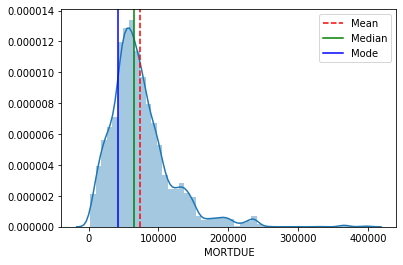

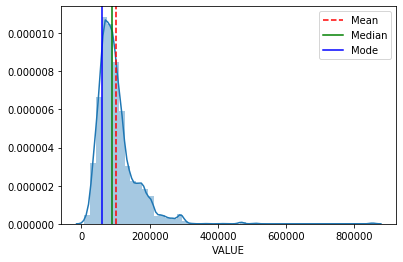

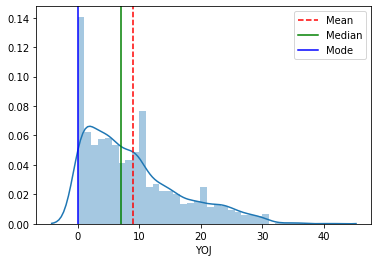

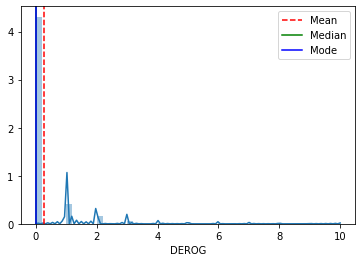

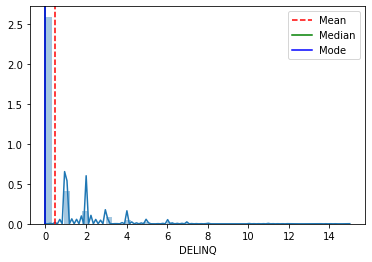

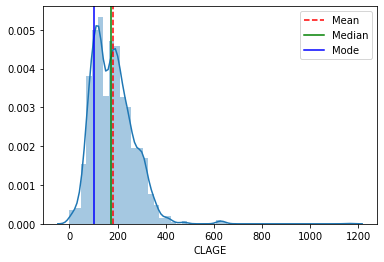

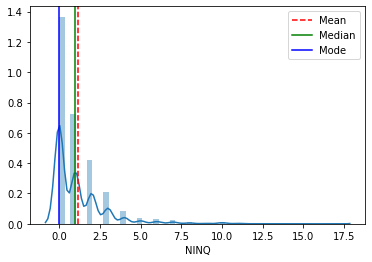

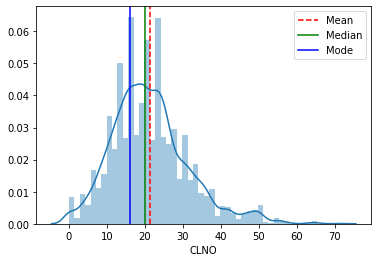

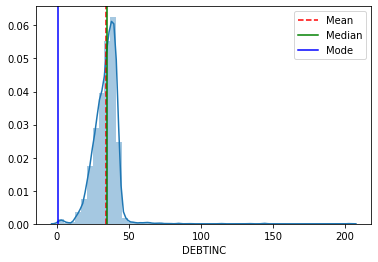

In [24]:
[distributions(column) for column in null_columns];

#### Mortdue null values
I am going to replace null values by the random values from np normal distribution,
taking into account mean and std of MORTDUE without null values.

In [25]:
def normal_replacement(column):
    mean = hmeq[column].mean()
    std = hmeq[column].std()
    return abs(np.random.normal(mean,std, size=hmeq.isnull().sum()[column]))

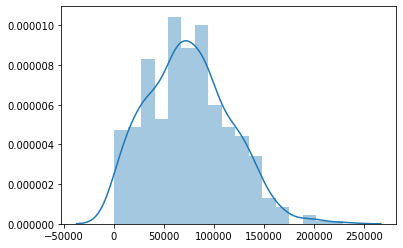

In [26]:
mortdue_replacement = normal_replacement('MORTDUE')
sns.distplot(mortdue_replacement);

Replace the null values by the np.random.normal array we have created, and we get the following distribution

In [27]:
def replace(column,l):
    for i in range(len(l)):
        hmeq.loc[hmeq[column].isnull()==True,column] = l[i]

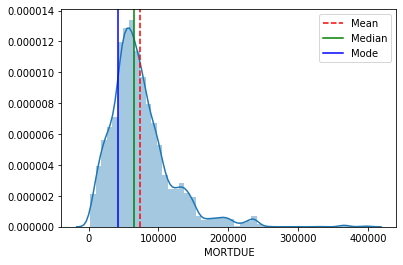

In [28]:
distributions('MORTDUE')
replace('MORTDUE',mortdue_replacement)

In [29]:
# Verify I have changed all the null values
hmeq.isnull().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

#### VALUE null values
I am going to apply the same strategy

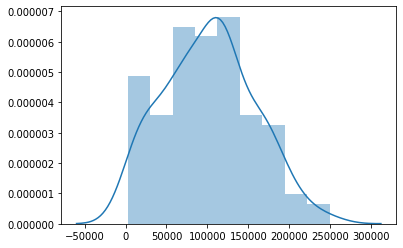

In [30]:
value_replacement = normal_replacement('VALUE')
sns.distplot(value_replacement);

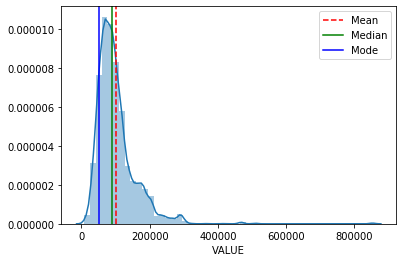

In [31]:
replace('VALUE',value_replacement)
distributions('VALUE');

#### CLAGE null values
I am going to use normal distribution again

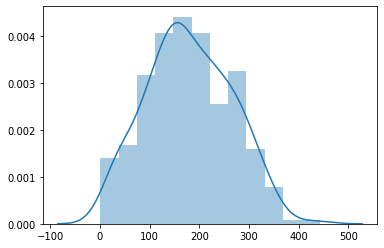

In [32]:
clage_replacement = normal_replacement('CLAGE')
sns.distplot(clage_replacement);

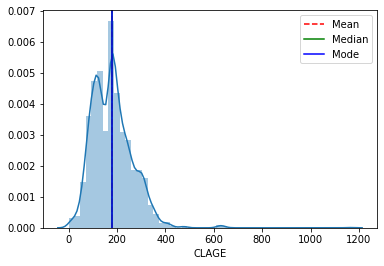

In [33]:
replace('CLAGE',clage_replacement)
distributions('CLAGE');

#### CLNO null values
I am going to use normal distribution again

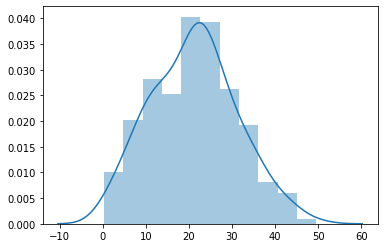

In [34]:
clno_replacement = normal_replacement('CLNO')
sns.distplot(clno_replacement);

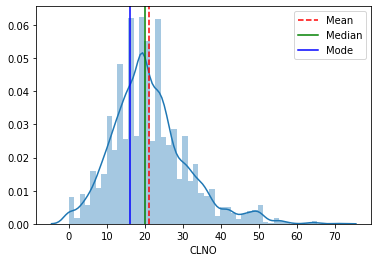

In [35]:
replace('CLNO',clno_replacement)
distributions('CLNO');

#### YOJ null values
I am going to divide the null values into two groups of equal size. One I am going to replace the null values by 0 (because the mode is 0 years working) and then I am going to replace the other group by a numpy random array following a uniform distribution from the mode to the mean. 

In [36]:
first_group_size = hmeq.isnull().sum()['YOJ']//2

In [37]:
second_group_size = hmeq.isnull().sum()['YOJ'] - first_group_size

In [38]:
zero_values = np.zeros(first_group_size)

In [39]:
uniform_values = np.random.uniform(hmeq['YOJ'].mode(),hmeq['YOJ'].mean(),second_group_size)

In [40]:
yoj_replacement = np.concatenate([zero_values,uniform_values], axis=0)

In [41]:
np.random.shuffle(yoj_replacement)

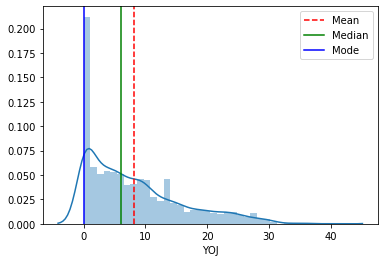

In [42]:
replace('YOJ', yoj_replacement)
distributions('YOJ');

#### DEROG, DEBTINC, NINQ and DELINQ null values
Replace null values by the mode, 0

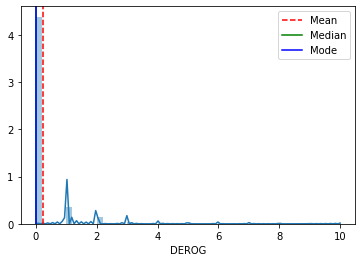

In [43]:
def replace_by_zero(column):
    replacement = np.zeros(hmeq.isnull().sum()[column])
    return replace(column,replacement)
replace_by_zero('DEROG')
distributions('DEROG');

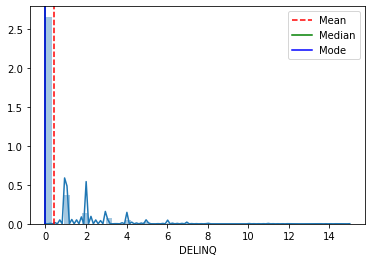

In [44]:
replace_by_zero('DELINQ')
distributions('DELINQ');

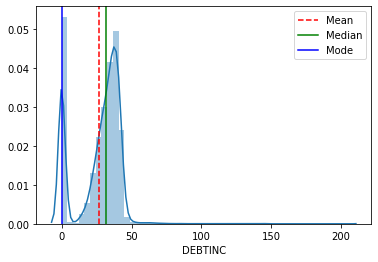

In [45]:
replace_by_zero('DEBTINC')
distributions('DEBTINC');

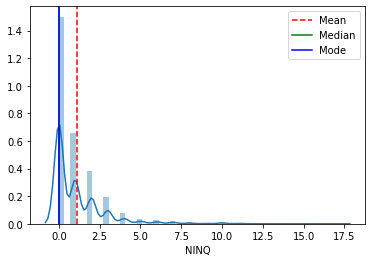

In [46]:
replace_by_zero('NINQ')
distributions('NINQ');

Verify I have no numeric null values left

In [47]:
hmeq.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON     252
JOB        279
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      0
dtype: int64

## Replace non numeric null values
#### REASON null values
In order to keep the ratio, I am going to divide the null values into 3, 2 parts I am going replace the value by DebtCon and the other third by HomeImp. 

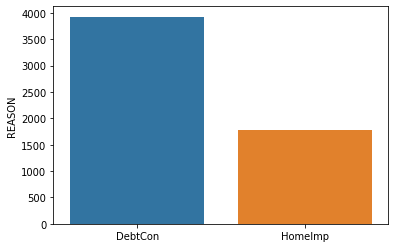

In [48]:
vc_reason = hmeq['REASON'].value_counts()
sns.barplot(x = vc_reason.index, y = vc_reason);

In [49]:
one_third_reason=hmeq.isnull().sum()['REASON']//3

In [50]:
reason_one = np.array(['DebtCon']*one_third_reason*2)

In [51]:
reason_two= np.array(['DebtCon']*one_third_reason)

In [52]:
reason_replacement = np.concatenate([reason_one,reason_two])

In [53]:
np.random.shuffle(reason_replacement)

In [54]:
replace('REASON',reason_replacement)

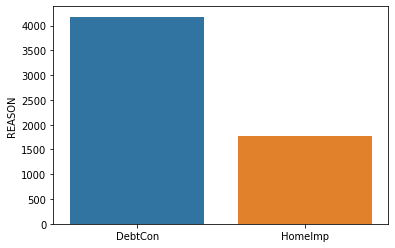

In [55]:
vc_reason = hmeq['REASON'].value_counts()
sns.barplot(x = vc_reason.index, y = vc_reason);

#### JOB null values
Replace the null values by 'other'

In [56]:
hmeq['JOB'].unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

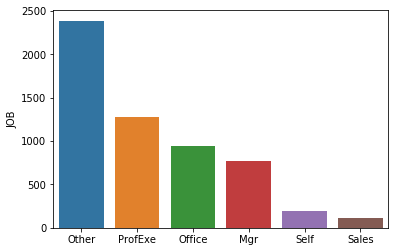

In [57]:
vc_jobs = hmeq['JOB'].value_counts()
sns.barplot(x = vc_jobs.index ,y = vc_jobs);

In [58]:
job_replacement = ['Other']*hmeq.isnull().sum()['JOB']

In [59]:
replace('JOB',job_replacement)

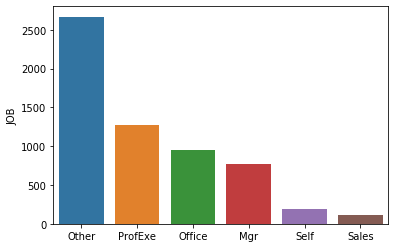

In [60]:
vc_jobs = hmeq['JOB'].value_counts()
sns.barplot(x = vc_jobs.index ,y = vc_jobs);

In [61]:
# Verify we have no null values left.
hmeq.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

Change REASON and JOB to numeric using get_dummies

In [62]:
hm = hmeq.copy()
hm = pd.get_dummies(hm)
hm.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.000000,39025.000000,10.5,0.0,0.0,94.366667,1.0,9.000000,0.0,0,1,0,0,1,0,0,0
1,1,1300,70053.000000,68400.000000,7.0,0.0,2.0,121.833333,0.0,14.000000,0.0,0,1,0,0,1,0,0,0
2,1,1500,13500.000000,16700.000000,4.0,0.0,0.0,149.466667,1.0,10.000000,0.0,0,1,0,0,1,0,0,0
3,1,1500,37383.938959,50781.894316,0.0,0.0,0.0,178.961516,0.0,19.366398,0.0,1,0,0,0,1,0,0,0
4,0,1700,97800.000000,112000.000000,3.0,0.0,0.0,93.333333,0.0,14.000000,0.0,0,1,0,1,0,0,0,0


In [63]:
hm.dtypes

BAD                 int64
LOAN                int64
MORTDUE           float64
VALUE             float64
YOJ               float64
DEROG             float64
DELINQ            float64
CLAGE             float64
NINQ              float64
CLNO              float64
DEBTINC           float64
REASON_DebtCon      uint8
REASON_HomeImp      uint8
JOB_Mgr             uint8
JOB_Office          uint8
JOB_Other           uint8
JOB_ProfExe         uint8
JOB_Sales           uint8
JOB_Self            uint8
dtype: object

In [64]:
# Export the csv file
hm.to_csv('../data/hmeq_clean.csv')

In [69]:
hmeq_clean = pd.read_csv('../data/hmeq_clean.csv')

In [70]:
# Verify I have exported the correct version
hmeq_clean.isnull().sum()

Unnamed: 0        0
BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

In [71]:
hm_cat = hmeq.copy()

In [135]:
def ratio(x):
    result = x[0]/(x[0]+x[1])
    return result

ct = pd.crosstab(hm_cat.JOB,hm_cat.BAD)
rat = ct.apply(ratio,axis=1).sort_values(ascending=False)

In [136]:
list(range(6))

[0, 1, 2, 3, 4, 5]

['NULL', 'Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']

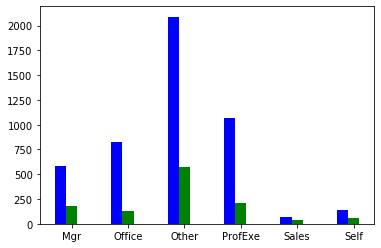

In [159]:
xlab = ['NULL','Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']

x = np.array(list(range(1,7)))
y = ct[0].values
z = ct[1].values
fig, ax = plt.subplots()
ax.bar(x-0.2, y, width=0.2, color='b', align='center');
ax.bar(x, z, width=0.2, color='g', align='center');
ax.set_xticklabels(xlab)
list(xlab)

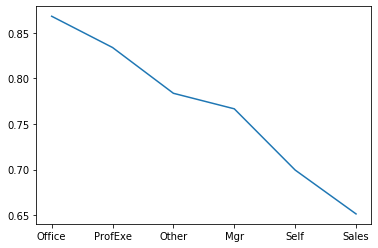

In [160]:
plt.plot(rat);

In [161]:
rat

JOB
Office     0.868143
ProfExe    0.833856
Other      0.783652
Mgr        0.766623
Self       0.699482
Sales      0.651376
dtype: float64

In [163]:
jobs_map = {col: list(rat.index).index(col) for col in rat.index}

In [166]:
hm_cat["JOB"]=hm_cat["JOB"].map(jobs_map)

In [167]:
ct_reason = pd.crosstab(hm_cat.REASON,hm_cat.BAD)
rat_reason = ct_reason.apply(ratio,axis=1).sort_values(ascending=False)

In [168]:
rat_reason

REASON
DebtCon    0.810287
HomeImp    0.777528
dtype: float64

In [169]:
reason_map = {col: list(rat_reason.index).index(col) for col in rat_reason.index}

In [170]:
hm_cat["REASON"]=hm_cat["REASON"].map(reason_map)

In [171]:
hm_cat.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000000,39025.000000,1,2,10.5,0.0,0.0,94.366667,1.0,9.000000,0.0
1,1,1300,70053.000000,68400.000000,1,2,7.0,0.0,2.0,121.833333,0.0,14.000000,0.0
2,1,1500,13500.000000,16700.000000,1,2,4.0,0.0,0.0,149.466667,1.0,10.000000,0.0
3,1,1500,37383.938959,50781.894316,0,2,0.0,0.0,0.0,178.961516,0.0,19.366398,0.0
4,0,1700,97800.000000,112000.000000,1,0,3.0,0.0,0.0,93.333333,0.0,14.000000,0.0


In [172]:
hm_cat.to_csv('../data/hmeq_clean_cat.csv')